# Malaria Cell Images Dataset Using CNN

### KV7006 : Machine Learning 

### Student Name: Nithin Cleetus <br>  Student ID : 21029412 <br>  
### Design, Development, Analysis and Performance Evaluation of Deep Learning algorithms

## Introduction:

According to the World Health Organization's (WHO) World Malaria Report 2021, there have been 241 million malaria cases, totalling 627,000 fatalities, worldwide in 2020, which is approximately 14 million more cases and 69,000 more deaths than in 2019 (HPS, 2021). Malaria Cell dataset is a collection of infected and uninfected cell images from NHS, compiled and uploaded in Kaggle. It contains a total of 27,558 images which can be used to train a CNN model and predict whether or not a given cell image is infected.
Convolutional neural network (CNN) model, a deep learning model specifically intended for classifying and predicting input such as images (Liang et al., 2016). 

## Objective:

The objective of this project is to build and train a Convolutional Neural Network (CNN) model, which is appropriate for image processing and classification and to predict whether or not a given cell image is infected. 


## Importing Libraries:

Initial steps are performed to import various libraries which are used at various stages of the code. 

In [1]:
## Importing basic libraries
import os
import cv2
import numpy as np 
import pandas as pd 
from os import listdir
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import shutil
import random
import glob
import warnings

In [2]:
## Importing tensorflow and associated packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten, ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Studying the dataset:

To do an initial analysis of the dataset, or perform EDA on the dataset, we must load the entire dataset images. 

Printing the working directory.

In [3]:
os.getcwd()

'C:\\Users\\Cleetus\\Downloads'

In this project, ImageDataGenerator function in tensorflow is utilized for lading the images. This function generates batches of tensor image data with real-time data augmentation. Image size is set to 128x128 for the entirety of this project. This is basic pre-processing step which can be used to reduce dimensions of all images. Image value is also scaled by 256 so that the pixel range remain between 0 and 1. This increases the computational speed for image processing. The images will be loaded as batches of size specified (default 32).

In [4]:
## setting variables for image dimesion
width = 128
height = 128

In [5]:
## Loading entire dataset using ImageDataGenerator().flow_from_directory function. 

EDA = ImageDataGenerator(rescale=1/255.0)
allImages = EDA.flow_from_directory('C:\\Users\\Cleetus\\Downloads\\Malaria\\cell_images', 
                                    target_size = (width, height), 
                                    classes=['Parasitized','Uninfected'],
                                    shuffle='FALSE',
                                    class_mode = 'binary')

Found 27558 images belonging to 2 classes.


In [6]:
## Defining a function to plot 10 sample image batches

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(25,25))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

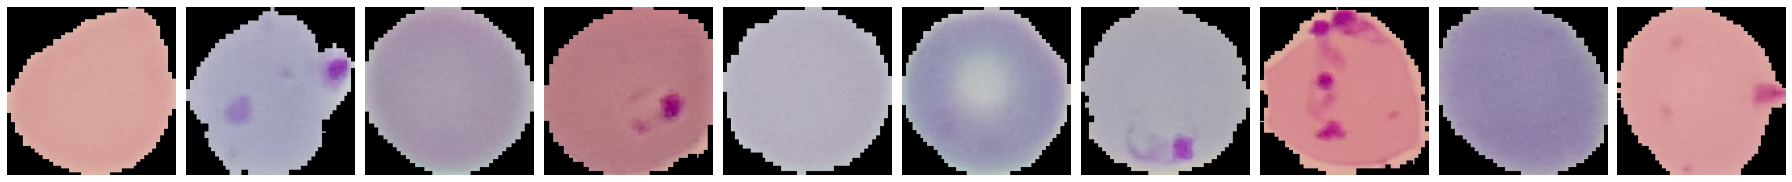

[1. 0. 1. 0. 1. 1. 0. 0. 1. 0.]
{'Parasitized': 0, 'Uninfected': 1}


In [7]:
## Plotting sample images and its corresponding labels from the dataset

allImgs, allLabels = next(allImages)

allClass=allImages.class_indices
plotImages(allImgs)
print(allLabels[0:10])
print(allClass)

From the images loaded, we can distinguish the images infected and uninfected cell images. The aim of the project is to build a deep learning model to predict whether the cell images are infected or not. The image generator function loads the data into binary classes with 1 representing Uninfected and 0 representing Parasitized. 

## Image Pre Processing:

### Image Samples

Processing the entire dataset containing 27,558 images will require a lot of computational resources. Hence a sample of this image dataset must be copied to 'train' and 'test' directories. For this project, a sample of 5000 infected and 5000 uninfected images for train and another sample of 100 infected and 100 uninfected images for test are copied using various os library function. Further analysis will be conducted on these sample images.


In [8]:
os.chdir('C:\\Users\\Cleetus\\Downloads\\Malaria\\cell_images\\Parasitized')
if os.path.isdir('C:\\Users\\Cleetus\\Downloads\\Malaria\\train\\Parasitized') is False:
    os.makedirs('C:\\Users\\Cleetus\\Downloads\\Malaria\\train\\Parasitized')
    os.makedirs('C:\\Users\\Cleetus\\Downloads\\Malaria\\test\\Parasitized')

    for i in random.sample(glob.glob('C*'), 5000):
        shutil.copy(i, 'C:\\Users\\Cleetus\\Downloads\\Malaria\\train\\Parasitized')           
    for i in random.sample(glob.glob('C*'), 100):
        shutil.copy(i, 'C:\\Users\\Cleetus\\Downloads\\Malaria\\test\\Parasitized')

In [9]:
os.chdir('C:\\Users\\Cleetus\\Downloads\\Malaria\\cell_images\\Uninfected')
if os.path.isdir('C:\\Users\\Cleetus\\Downloads\\Malaria\\train\\Uninfected') is False:
    os.makedirs('C:\\Users\\Cleetus\\Downloads\\Malaria\\train\\Uninfected')
    os.makedirs('C:\\Users\\Cleetus\\Downloads\\Malaria\\test\\Uninfected')

    for i in random.sample(glob.glob('C*'), 5000):
        shutil.copy(i, 'C:\\Users\\Cleetus\\Downloads\\Malaria\\train\\Uninfected')           
    for i in random.sample(glob.glob('C*'), 100):
        shutil.copy(i, 'C:\\Users\\Cleetus\\Downloads\\Malaria\\test\\Uninfected')

## CNN Model 1 

### Image Pre Processing for CNN Model 1:
Only a simple rescaling of 256 is applied to the 1st CNN model. Validation spilt is done at 20 percent of the training data.

In [10]:
##Image pre=processing CNN1
preprocessingCNN1 = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [11]:
## train batch for CNN1
train_batchCNN1 = preprocessingCNN1.flow_from_directory(directory='C:\\Users\\Cleetus\\Downloads\\Malaria\\train',
                                                   target_size = (width,height),
                                                   classes=['Parasitized','Uninfected'],
                                                   class_mode = 'binary',
                                                   batch_size = 40,
                                                   subset = 'training'
                                                    )

Found 8000 images belonging to 2 classes.


In [12]:
## validation batch for CNN1
valid_batchCNN1 = preprocessingCNN1.flow_from_directory(directory='C:\\Users\\Cleetus\\Downloads\\Malaria\\train',
                                                   target_size = (width,height),
                                                   classes=['Parasitized', 'Uninfected'],
                                                   class_mode = 'binary',
                                                   batch_size = 40,
                                                   subset = 'validation'
                                                    )

Found 2000 images belonging to 2 classes.


In [13]:
## test batch for CNN1
test_batchCNN1 = preprocessingCNN1.flow_from_directory(directory='C:\\Users\\Cleetus\\Downloads\\Malaria\\test',
                                                   target_size = (width,height),
                                                   classes=['Parasitized', 'Uninfected'],
                                                   class_mode = 'binary',
                                                   batch_size = 32,
                                                   shuffle=False
                                                    )

Found 200 images belonging to 2 classes.


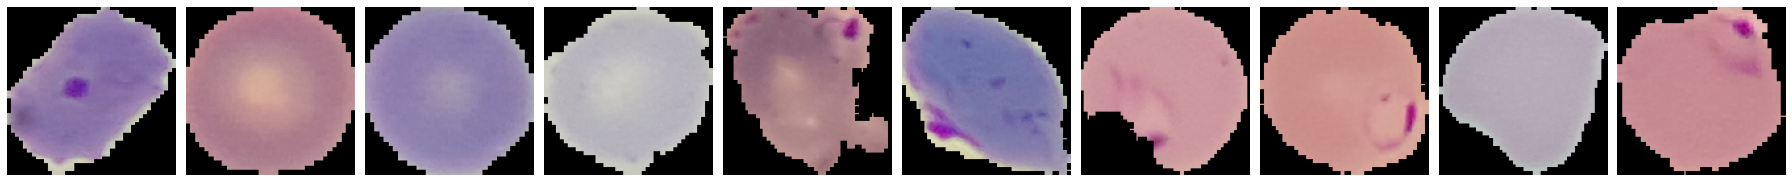

[0. 1. 1. 1. 0. 0. 0. 0. 1. 0.]
{'Parasitized': 0, 'Uninfected': 1}


In [14]:
## plotting sample train images 

imgs, labels = next(train_batchCNN1)

plotImages(imgs)
print(labels[0:10])
print(allClass)

### Model building for CNN Model 1:
This model is build using 2 convolution2D layers with maxpooling and 2 Dense layers.

In [15]:
##Adding layers for CNN1

CNN1 = Sequential()

CNN1.add(Conv2D(64, (3,3), input_shape = (width,height, 3), activation='relu'))
CNN1.add(MaxPool2D(2,2))
CNN1.add(Dropout(0.2))

CNN1.add(Conv2D(32, (3,3), activation='relu'))
CNN1.add(MaxPool2D(2,2))
CNN1.add(Dropout(0.3))

CNN1.add(Flatten())
CNN1.add(Dense(128, activation='relu'))
CNN1.add(Dropout(0.5))

CNN1.add(Dense(1, activation='sigmoid'))


In [16]:
CNN1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 32)        0

In [17]:
## compiling the CNN1 model

CNN1.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

### Model fitting for CNN Model 1:

In [18]:
## fitting the CNN1 model
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience=4)

history = CNN1.fit_generator(generator=train_batchCNN1,
                             steps_per_epoch = len(train_batchCNN1),
                             epochs = 25,
                             validation_data = valid_batchCNN1,
                             validation_steps = len(valid_batchCNN1),
                             callbacks=[callback])

C:\Users\Cleetus\AppData\Local\Temp\ipykernel_18252\3513928344.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = CNN1.fit_generator(generator=train_batchCNN1,


Epoch 1/25
200/200 [==============================] - 110s 545ms/step - loss: 0.7176 - accuracy: 0.5590 - val_loss: 0.7052 - val_accuracy: 0.5235
Epoch 2/25
200/200 [==============================] - 108s 540ms/step - loss: 0.6556 - accuracy: 0.6101 - val_loss: 0.6899 - val_accuracy: 0.5525
Epoch 3/25
200/200 [==============================] - 118s 590ms/step - loss: 0.6227 - accuracy: 0.6590 - val_loss: 0.6003 - val_accuracy: 0.6750
Epoch 4/25
200/200 [==============================] - 120s 598ms/step - loss: 0.4078 - accuracy: 0.8361 - val_loss: 0.3259 - val_accuracy: 0.9160
Epoch 5/25
200/200 [==============================] - 111s 557ms/step - loss: 0.2446 - accuracy: 0.9219 - val_loss: 0.2292 - val_accuracy: 0.9260
Epoch 6/25
200/200 [==============================] - 110s 551ms/step - loss: 0.1834 - accuracy: 0.9342 - val_loss: 0.2257 - val_accuracy: 0.9340
Epoch 7/25
200/200 [==============================] - 106s 531ms/step - loss: 0.1600 - accuracy: 0.9430 - val_loss: 0.2561 -

In [19]:
history.history

{'loss': [0.7176263928413391,
  0.6556072235107422,
  0.6226509213447571,
  0.40781715512275696,
  0.24464963376522064,
  0.18344548344612122,
  0.15998102724552155,
  0.14072993397712708,
  0.11920873820781708,
  0.11825838685035706],
 'accuracy': [0.5590000152587891,
  0.6101250052452087,
  0.6589999794960022,
  0.8361250162124634,
  0.921875,
  0.934249997138977,
  0.9430000185966492,
  0.9484999775886536,
  0.9587500095367432,
  0.956375002861023],
 'val_loss': [0.7052023410797119,
  0.6898590922355652,
  0.6003291606903076,
  0.3259081542491913,
  0.2292366474866867,
  0.22566767036914825,
  0.2561194598674774,
  0.2395593822002411,
  0.2420312762260437,
  0.2497185319662094],
 'val_accuracy': [0.5235000252723694,
  0.5525000095367432,
  0.675000011920929,
  0.9160000085830688,
  0.9259999990463257,
  0.9340000152587891,
  0.9229999780654907,
  0.9304999709129333,
  0.9275000095367432,
  0.9235000014305115]}

### Plotting Accuracy and Loss Learning Curve CNN Model 1:

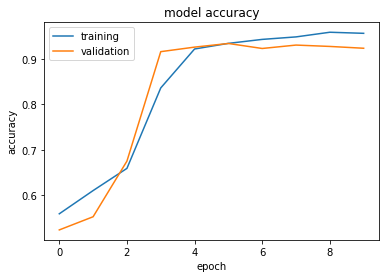

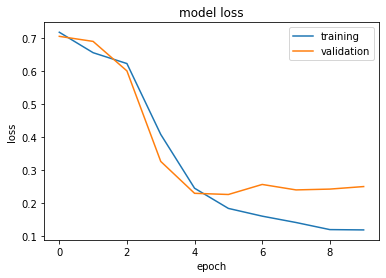

In [20]:
## Plotting model accuracy and loss

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

### Prediction using CNN Model 1:

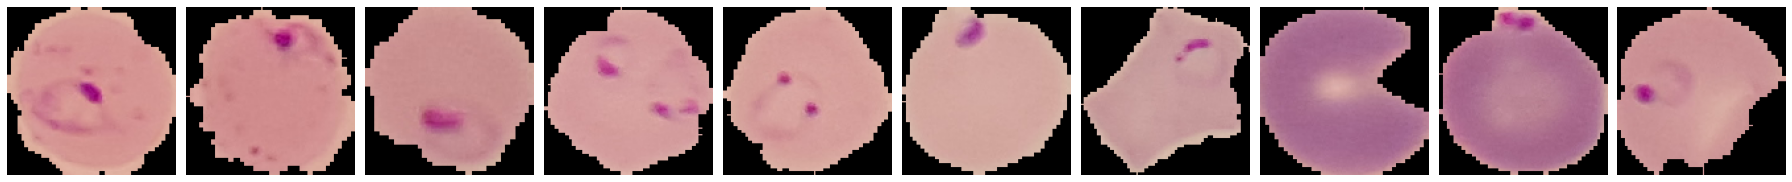

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'Parasitized': 0, 'Uninfected': 1}


In [21]:
## plotting test images
test_imgs, test_labels = next(test_batchCNN1)
plotImages(test_imgs)
print(test_labels[0:10])
print(allClass)

In [22]:
## prediction using CNN1 model

from sklearn.metrics import classification_report, confusion_matrix

test_batchCNN1.reset()

true = test_batchCNN1.classes
pred = CNN1.predict(x=test_batchCNN1, steps=len(test_batchCNN1), verbose=0)
pred = np.round(pred)

### Classification Report, Performance Metrics and Confusion Matrix CNN Model 1:

In [23]:
## classification_report

print('Confusion Matrix')
print(confusion_matrix(true, pred))
print('Classification Report')
target_names = ['Parasitized', 'Un-Infected']
print(classification_report(true, pred, target_names=target_names))

Confusion Matrix
[[95  5]
 [ 9 91]]
Classification Report
              precision    recall  f1-score   support

 Parasitized       0.91      0.95      0.93       100
 Un-Infected       0.95      0.91      0.93       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



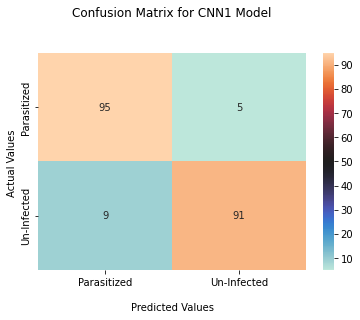

In [24]:
## Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true, pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='icefire')

ax.set_title('Confusion Matrix for CNN1 Model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Parasitized','Un-Infected'])
ax.yaxis.set_ticklabels(['Parasitized','Un-Infected'])

## Display the visualization of the Confusion Matrix.
plt.show()

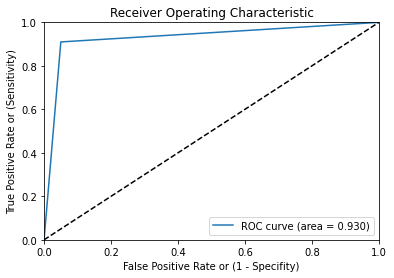

In [25]:
## ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(true, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [26]:
## plotting ROC Curve using plotly

import plotly.express as px
from sklearn.metrics import precision_recall_curve, auc

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve CNN1 Model (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='FP Rate', y='TP Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [27]:
## plotting PR Curve using plotly

precision, recall, thresholds = precision_recall_curve(true,pred)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve CNN1 Model(AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

### Fine Tuning CNN Model 1:

Fine tuning is done using kera_tuner function to build the best available model

In [28]:
## keras tuner
import keras_tuner as kt

In [29]:
#defining CNN1 model

def build_model(hp):
    # Create the model
    CNN1 = Sequential()
    CNN1.add(Conv2D(hp.Choice('filters', [32, 64]), (3,3), input_shape = (width,height, 3), activation='relu'))
    CNN1.add(MaxPool2D(2,2))
    CNN1.add(Dropout(0.2))
    CNN1.add(Conv2D(32, (3,3), activation='relu'))
    CNN1.add(MaxPool2D(2,2))
    CNN1.add(Dropout(0.3))
    CNN1.add(Flatten())
    CNN1.add(Dense(128, activation='relu'))
    CNN1.add(Dropout(0.5))
    CNN1.add(Dense(1, activation='sigmoid'))
    CNN1.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
    return CNN1


In [30]:
# use RandomSearch from keras_tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    overwrite=True,
    directory='C:\\Users\\Cleetus\\Downloads\\Tuner1')

In [31]:
# start the search
tuner.search(train_batchCNN1,steps_per_epoch = len(train_batchCNN1), epochs=5, validation_data = test_batchCNN1, validation_steps = len(test_batchCNN1))

Trial 2 Complete [00h 04m 23s]
val_loss: 0.1951296627521515

Best val_loss So Far: 0.1951296627521515
Total elapsed time: 00h 11m 40s
INFO:tensorflow:Oracle triggered exit


In [32]:
best_modelCNN1 = tuner.get_best_models()[0]

In [33]:
test_batchCNN1.reset()

trueBM = test_batchCNN1.classes
predBM = best_modelCNN1.predict(x=test_batchCNN1, steps=len(test_batchCNN1), verbose=0)
predBM = np.round(predBM)

print('Confusion Matrix')
print(confusion_matrix(trueBM, predBM))
print('Classification Report')
target_names = ['Parasitized', 'Un-Infected']
print(classification_report(trueBM, predBM, target_names=target_names))

Confusion Matrix
[[98  2]
 [10 90]]
Classification Report
              precision    recall  f1-score   support

 Parasitized       0.91      0.98      0.94       100
 Un-Infected       0.98      0.90      0.94       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



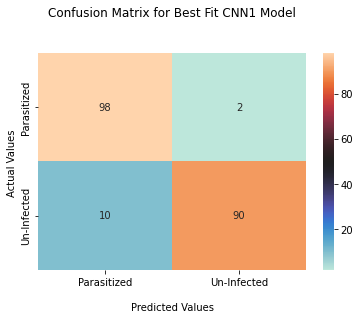

In [34]:
## Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(trueBM, predBM)
ax = sns.heatmap(cf_matrix, annot=True, cmap='icefire')

ax.set_title('Confusion Matrix for Best Fit CNN1 Model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Parasitized','Un-Infected'])
ax.yaxis.set_ticklabels(['Parasitized','Un-Infected'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [75]:
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(trueBM, predBM)
roc_auc = auc(fpr, tpr)

In [76]:
## ROC using plotly
import plotly.express as px
from sklearn.metrics import precision_recall_curve, auc

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve Best Fit CNN1 Model (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='FP Rate', y='TP Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [78]:
## Precision-Recall Curve using plotly

precision, recall, thresholds = precision_recall_curve(trueBM, predBM)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Best Fit Curve CNN1 Model(AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

 ## CNN Model 2

CNN Model 2 is slightly different from CNN Model1 with additional image processing step and an added convolution 2D layer.

### Image Pre Processing for CNN Model 2:
A simple rescaling of 256 is applied to the 2nd CNN model. Validation spilt is done at 20 percent of the training data.
Additionally, a pre-defined image pre-processing function vgg16.preprocess_input is employed to pre-process the image. This is pretrained image processing function. 


In [35]:
preprocessingCNN2 = ImageDataGenerator(rescale=1/255.0, validation_split=0.2, preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [36]:
train_batchCNN2 = preprocessingCNN2.flow_from_directory(directory='C:\\Users\\Cleetus\\Downloads\\Malaria\\train',
                                                   target_size = (width,height),
                                                   classes=['Parasitized','Uninfected'],
                                                   class_mode = 'binary',
                                                   batch_size = 40,
                                                   subset = 'training'
                                                    )

valid_batchCNN2 = preprocessingCNN2.flow_from_directory(directory='C:\\Users\\Cleetus\\Downloads\\Malaria\\train',
                                                   target_size = (width,height),
                                                   classes=['Parasitized', 'Uninfected'],
                                                   class_mode = 'binary',
                                                   batch_size = 40,
                                                   subset = 'validation'
                                                    )

test_batchCNN2 = preprocessingCNN2.flow_from_directory(directory='C:\\Users\\Cleetus\\Downloads\\Malaria\\test',
                                                   target_size = (width,height),
                                                   classes=['Parasitized', 'Uninfected'],
                                                   class_mode = 'binary',
                                                   batch_size = 32,
                                                   shuffle=False
                                                    )
                                             

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

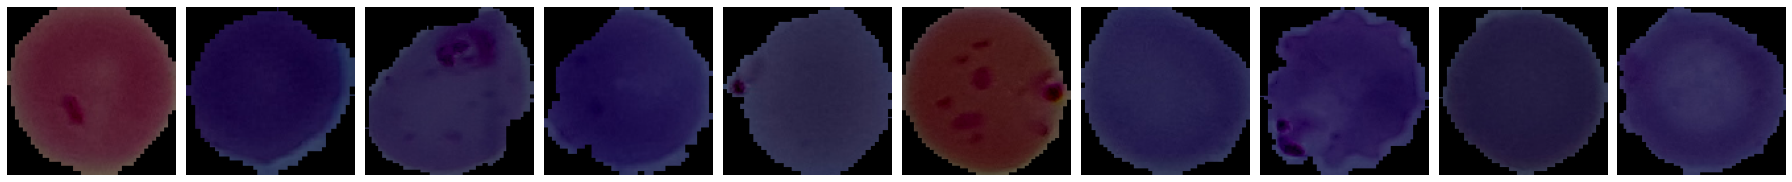

[1. 1. 0. 1. 0. 0. 1. 0. 1. 1.]
{'Parasitized': 0, 'Uninfected': 1}


In [37]:
#plotting a sample of 10  images

imgs, labels = next(train_batchCNN2)
plotImages(imgs)
print(labels[0:10])
print(allClass)

### Model building for CNN Model 2:
This model is build using 3 convolution2D layers with maxpooling and 2 Dense layers.

In [38]:
CNN2 = Sequential()

CNN2.add(Conv2D(64, (3,3), input_shape = (width,height, 3), activation='relu'))
CNN2.add(MaxPool2D(2,2))
CNN2.add(Dropout(0.2))

CNN2.add(Conv2D(32, (3,3), activation='relu'))
CNN2.add(MaxPool2D(2,2))

CNN2.add(Conv2D(32, (3,3), activation='relu'))
CNN2.add(MaxPool2D(2,2))
CNN2.add(Dropout(0.3))

CNN2.add(Flatten())
CNN2.add(Dense(128, activation='relu'))
CNN2.add(Dropout(0.5))

CNN2.add(Dense(1, activation='sigmoid'))

In [39]:
CNN2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 63, 63, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)       

In [40]:
CNN2.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

### Model fitting for CNN Model 2:

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience=4)

history = CNN2.fit_generator(generator=train_batchCNN2,
                              steps_per_epoch = len(train_batchCNN2),
                              epochs = 25,
                              validation_data = test_batchCNN2,
                              validation_steps = len(test_batchCNN2),
                              callbacks=[callback])

Epoch 1/25


C:\Users\Cleetus\AppData\Local\Temp\ipykernel_18252\679148047.py:5: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



200/200 [==============================] - 102s 508ms/step - loss: 0.4634 - accuracy: 0.7786 - val_loss: 0.1985 - val_accuracy: 0.9450
Epoch 2/25
200/200 [==============================] - 98s 492ms/step - loss: 0.1847 - accuracy: 0.9420 - val_loss: 0.2221 - val_accuracy: 0.9350
Epoch 3/25
200/200 [==============================] - 94s 469ms/step - loss: 0.1547 - accuracy: 0.9541 - val_loss: 0.2153 - val_accuracy: 0.9500
Epoch 4/25
200/200 [==============================] - 87s 436ms/step - loss: 0.1369 - accuracy: 0.9584 - val_loss: 0.1746 - val_accuracy: 0.9450
Epoch 5/25
200/200 [==============================] - 85s 426ms/step - loss: 0.1227 - accuracy: 0.9628 - val_loss: 0.1710 - val_accuracy: 0.9600
Epoch 6/25
200/200 [==============================] - 97s 485ms/step - loss: 0.1072 - accuracy: 0.9664 - val_loss: 0.1684 - val_accuracy: 0.9600
Epoch 7/25
200/200 [==============================] - 100s 499ms/step - loss: 0.1014 - accuracy: 0.9669 - val_loss: 0.1742 - val_accuracy: 0

In [42]:
history.history

{'loss': [0.4634491503238678,
  0.18465952575206757,
  0.1547180414199829,
  0.13690374791622162,
  0.12272273004055023,
  0.10717836022377014,
  0.10139704495668411,
  0.09580665826797485,
  0.07982371747493744,
  0.07834600657224655,
  0.07021274417638779,
  0.0656682699918747,
  0.05948001518845558],
 'accuracy': [0.7786250114440918,
  0.9419999718666077,
  0.9541249871253967,
  0.9583749771118164,
  0.9627500176429749,
  0.9663749933242798,
  0.9668750166893005,
  0.9704999923706055,
  0.9741250276565552,
  0.9729999899864197,
  0.9764999747276306,
  0.9783750176429749,
  0.9788749814033508],
 'val_loss': [0.19852475821971893,
  0.2220596820116043,
  0.2152668982744217,
  0.17464672029018402,
  0.17098326981067657,
  0.1683761179447174,
  0.17418307065963745,
  0.16852876543998718,
  0.15268100798130035,
  0.17459841072559357,
  0.17320606112480164,
  0.21115779876708984,
  0.18166731297969818],
 'val_accuracy': [0.9449999928474426,
  0.9350000023841858,
  0.949999988079071,
  0.94

### Plotting Accuracy and Loss Learning Curve CNN Model 2:

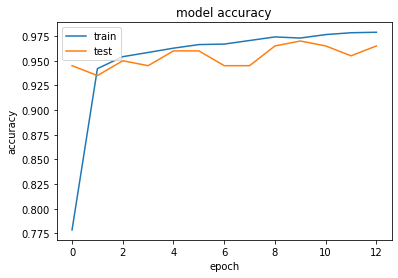

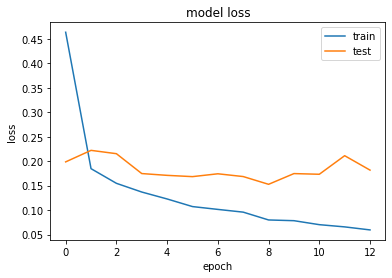

In [43]:
## plotting accuracy v loss

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Prediction using CNN Model 2:

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

test_batchCNN2.reset()
trueCNN2 = test_batchCNN2.classes
predCNN2 = CNN2.predict(x=test_batchCNN2, steps=len(test_batchCNN2), verbose=0)
predCNN2 = np.round(predCNN2)

### Classification Report, Performance Metrics and Confusion Matrix CNN Model 2:

In [45]:
#classification_report

print('Confusion Matrix For CNN2')
print(confusion_matrix(trueCNN2, predCNN2))
print('Classification Report For CNN2')
target_names = ['Parasitized', 'Un-Infected']
print(classification_report(trueCNN2, predCNN2, target_names=target_names))

Confusion Matrix For CNN2
[[95  5]
 [ 2 98]]
Classification Report For CNN2
              precision    recall  f1-score   support

 Parasitized       0.98      0.95      0.96       100
 Un-Infected       0.95      0.98      0.97       100

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



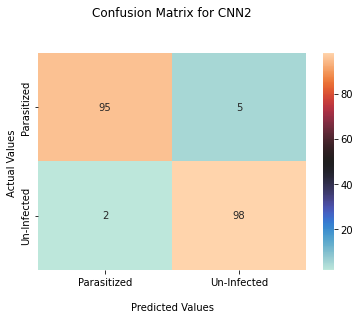

In [46]:
## confusion matirx

import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(trueCNN2, predCNN2)
ax = sns.heatmap(cf_matrix, annot=True, cmap='icefire')

ax.set_title('Confusion Matrix for CNN2\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Parasitized','Un-Infected'])
ax.yaxis.set_ticklabels(['Parasitized','Un-Infected'])

## Display the visualization of the Confusion Matrix.
plt.show()


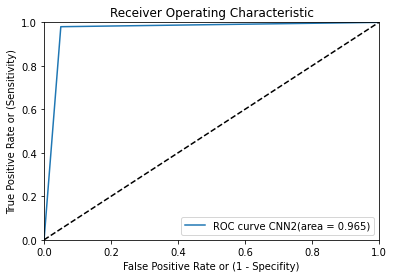

In [47]:
## ROC 

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(trueCNN2,predCNN2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve CNN2(area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [48]:
## ROC using plotly

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve CNN2(AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='FP Rate', y='TP Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [49]:
## PR Curve using plotly

import plotly.express as px
from sklearn.metrics import precision_recall_curve, auc


precision, recall, thresholds = precision_recall_curve(trueCNN2,predCNN2)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve CNN2(AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

### Fine Tuning CNN Model 2:

Fine tuning is done using kera_tuner function to build the best available model

In [50]:
import keras_tuner as kt

In [51]:
#defining CNN2 model

def build_model(hp):
    # Create the model
    CNN2 = Sequential()
    CNN2.add(Conv2D(hp.Choice('filters', [32, 64]), (3,3), input_shape = (width,height, 3), activation='relu'))
    CNN2.add(MaxPool2D(2,2))
    CNN2.add(Dropout(0.2))
    CNN2.add(Conv2D(32, (3,3), activation='relu'))
    CNN2.add(MaxPool2D(2,2))
    CNN2.add(Conv2D(32, (3,3), activation='relu'))
    CNN2.add(MaxPool2D(2,2))
    CNN2.add(Dropout(0.3))
    CNN2.add(Flatten())
    CNN2.add(Dense(128, activation='relu'))
    CNN2.add(Dropout(0.5))
    CNN2.add(Dense(1, activation='sigmoid'))
    CNN2.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
    return CNN2


In [52]:
# use RandomSearch from keras_tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    overwrite=True,
    directory='C:\\Users\\Cleetus\\Downloads\\Malaria\\Tuner2')

In [53]:
# start the search
tuner.search(train_batchCNN2,steps_per_epoch = len(train_batchCNN2), epochs=5, validation_data = test_batchCNN2, validation_steps = len(test_batchCNN2))

Trial 2 Complete [00h 04m 33s]
val_loss: 0.1516343504190445

Best val_loss So Far: 0.1516343504190445
Total elapsed time: 00h 12m 33s
INFO:tensorflow:Oracle triggered exit


In [54]:
best_modelCNN2 = tuner.get_best_models()[0]

In [55]:
test_batchCNN2.reset()

trueCNN2BM = test_batchCNN2.classes
predCNN2BM = best_modelCNN2.predict(x=test_batchCNN2, steps=len(test_batchCNN2), verbose=0)
predCNN2BM = np.round(predCNN2BM)

print('Confusion Matrix')
print(confusion_matrix(trueCNN2BM, predCNN2BM))
print('Classification Report')
target_names = ['Parasitized', 'Un-Infected']
print(classification_report(trueCNN2BM, predCNN2BM, target_names=target_names))

Confusion Matrix
[[93  7]
 [ 1 99]]
Classification Report
              precision    recall  f1-score   support

 Parasitized       0.99      0.93      0.96       100
 Un-Infected       0.93      0.99      0.96       100

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



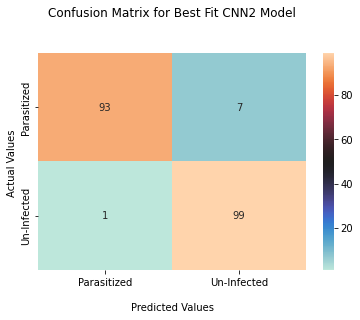

In [85]:
## Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(trueCNN2BM, predCNN2BM)
ax = sns.heatmap(cf_matrix, annot=True, cmap='icefire')

ax.set_title('Confusion Matrix for Best Fit CNN2 Model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Parasitized','Un-Infected'])
ax.yaxis.set_ticklabels(['Parasitized','Un-Infected'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [79]:
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(trueCNN2BM, predCNN2BM)
roc_auc = auc(fpr, tpr)

In [80]:
## ROC using plotly

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve Best Fit CNN2(AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='FP Rate', y='TP Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [81]:
## PR Curve using plotly
precision, recall, thresholds = precision_recall_curve(trueCNN2BM, predCNN2BM)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve Best Fit CNN2(AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

## CNN Greyscale Model

### Image Pre Processing for CNN Greyscale Model:
The input images are converted to greyscale using ImageDataGenerator's tf.image.rgb_to_grayscale function

In [57]:
preprocessing = ImageDataGenerator(rescale=1/255.0, validation_split=0.2, preprocessing_function=tf.image.rgb_to_grayscale)

In [58]:
## train, test and valid batches for CNN-G Model
train_batch = preprocessing.flow_from_directory(directory='C:\\Users\\Cleetus\\Downloads\\Malaria\\train',
                                                   target_size = (width,height),
                                                   classes=['Parasitized','Uninfected'],
                                                   class_mode = 'binary',
                                                   batch_size = 40,
                                                   subset = 'training'
                                                    )

valid_batch = preprocessing.flow_from_directory(directory='C:\\Users\\Cleetus\\Downloads\\Malaria\\train',
                                                   target_size = (width,height),
                                                   classes=['Parasitized', 'Uninfected'],
                                                   class_mode = 'binary',
                                                   batch_size = 40,
                                                   subset = 'validation'
                                                    )

test_batch = preprocessing.flow_from_directory(directory='C:\\Users\\Cleetus\\Downloads\\Malaria\\test',
                                                   target_size = (width,height),
                                                   classes=['Parasitized', 'Uninfected'],
                                                   class_mode = 'binary',
                                                   batch_size = 32,
                                                   shuffle=False
                                                    )

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [83]:
imgs, labels = next(train_batch)

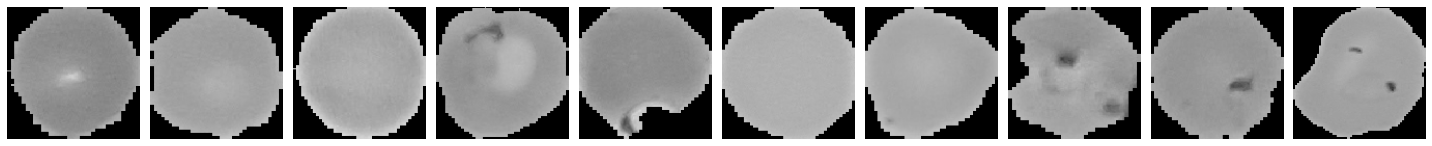

[1. 1. 1. 0. 0. 1. 1. 0. 0. 0.]
{'Parasitized': 0, 'Uninfected': 1}


In [84]:
## plotting pre processed images

plotImages(imgs)
print(labels[0:10])
print(allClass)

### Model building for CNN Greyscale Model:
This model is build using 2 convolution2D layers with maxpooling and 2 Dense layers.

In [61]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (width,height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 30, 30, 32)       

In [63]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

### Model fitting for CNN Greyscale Model:

In [64]:
history = model.fit_generator(generator=train_batch,
                              steps_per_epoch = len(train_batch),
                              epochs = 10,
                              validation_data = test_batch,
                              validation_steps = len(test_batch))

Epoch 1/10


C:\Users\Cleetus\AppData\Local\Temp\ipykernel_18252\504110566.py:1: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



200/200 [==============================] - 53s 264ms/step - loss: 0.6920 - accuracy: 0.5745 - val_loss: 0.6558 - val_accuracy: 0.6300
Epoch 2/10
200/200 [==============================] - 54s 269ms/step - loss: 0.6576 - accuracy: 0.6160 - val_loss: 0.6497 - val_accuracy: 0.6400
Epoch 3/10
200/200 [==============================] - 53s 265ms/step - loss: 0.6395 - accuracy: 0.6330 - val_loss: 0.6244 - val_accuracy: 0.6800
Epoch 4/10
200/200 [==============================] - 52s 260ms/step - loss: 0.6196 - accuracy: 0.6612 - val_loss: 0.6077 - val_accuracy: 0.6800
Epoch 5/10
200/200 [==============================] - 54s 270ms/step - loss: 0.5879 - accuracy: 0.6808 - val_loss: 0.5976 - val_accuracy: 0.6900
Epoch 6/10
200/200 [==============================] - 60s 301ms/step - loss: 0.5662 - accuracy: 0.7010 - val_loss: 0.6006 - val_accuracy: 0.6950
Epoch 7/10
200/200 [==============================] - 59s 294ms/step - loss: 0.5358 - accuracy: 0.7241 - val_loss: 0.5937 - val_accuracy: 0.6

In [65]:
history.history

{'loss': [0.6919684410095215,
  0.6576202511787415,
  0.6395205855369568,
  0.6196221709251404,
  0.5878728032112122,
  0.5661745667457581,
  0.5358484983444214,
  0.4983581304550171,
  0.4607201814651489,
  0.4302900433540344],
 'accuracy': [0.5745000243186951,
  0.6159999966621399,
  0.6330000162124634,
  0.6612499952316284,
  0.6807500123977661,
  0.7009999752044678,
  0.7241250276565552,
  0.7461249828338623,
  0.7714999914169312,
  0.7860000133514404],
 'val_loss': [0.6557544469833374,
  0.6496557593345642,
  0.6244080066680908,
  0.6076687574386597,
  0.5976307988166809,
  0.6005806922912598,
  0.5937027335166931,
  0.5921380519866943,
  0.6059102416038513,
  0.5939241051673889],
 'val_accuracy': [0.6299999952316284,
  0.6399999856948853,
  0.6800000071525574,
  0.6800000071525574,
  0.6899999976158142,
  0.6949999928474426,
  0.6549999713897705,
  0.6949999928474426,
  0.6850000023841858,
  0.6899999976158142]}

### Plotting Accuracy and Loss Learning Curve CNN Greyscale Model:

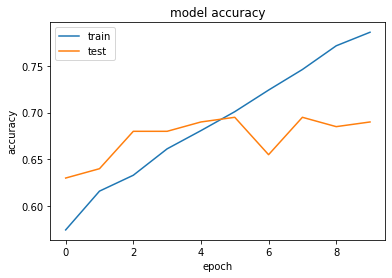

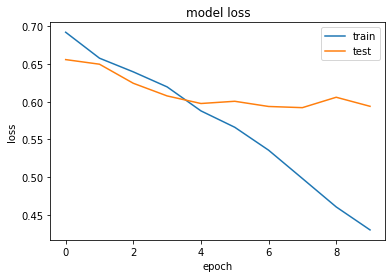

In [66]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

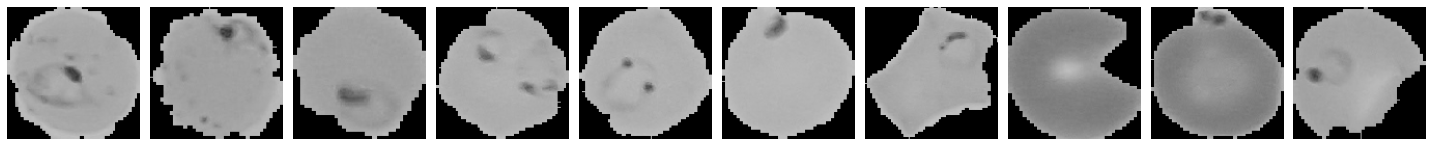

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [67]:
test_imgs, test_labels = next(test_batch)
plotImages(test_imgs)
print(test_labels)


### Prediction using CNN Greyscale Model:

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

test_batch.reset()
true = test_batch.classes
pred = model.predict(x=test_batch, steps=len(test_batch), verbose=0)
pred = np.round(pred)


### Classification Report, Performance Metrics and Confusion Matrix CNN Greyscale Model:

In [88]:
# import classification_report

print('Confusion Matrix')
print(confusion_matrix(true, pred))
print('Classification Report')
target_names = ['Parasitized', 'Un-Infected']
print(classification_report(true, pred, target_names=target_names))

Confusion Matrix
[[67 33]
 [29 71]]
Classification Report
              precision    recall  f1-score   support

 Parasitized       0.70      0.67      0.68       100
 Un-Infected       0.68      0.71      0.70       100

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200



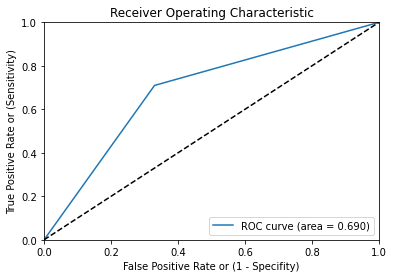

In [90]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(true, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [92]:
## ROC Curve using plotly

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve CNN-G(AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [91]:
## PR Curve using plotly
import plotly.express as px
from sklearn.metrics import precision_recall_curve, auc


precision, recall, thresholds = precision_recall_curve(true,pred)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

## Reference:

HPS, 2021. HPS Website - World Malaria Report 2021. Available at: https://www.hps.scot.nhs.uk/publications/hps-weekly-report/volume-55/issue-50/world-malaria-report-2021/ (Accessed 23 May 2022).

Liang, Z., Powell, A., Ersoy, I., Poostchi, M., Silamut, K., Palaniappan, K., Guo, P., Hossain, M.A., Sameer, A., Maude, R.J. and Huang, J.X., 2016, December. CNN-based image analysis for malaria diagnosis. In 2016 IEEE international conference on bioinformatics and biomedicine (BIBM) (pp. 493-496). IEEE.